<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Firm Selection

In [8]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

# Data Collection

### Stock Price

In [9]:
import yfinance as yf

# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Close,High,Low,Open,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-07 00:00:00-05:00,NaN,NaN,NaN,NaN,0,0.1925,0.0
2020-02-10 00:00:00-05:00,78.119232,78.119232,76.248554,76.328723,109348800,0.0000,0.0
2020-02-11 00:00:00-05:00,77.647919,78.690158,77.429269,78.617278,94323200,0.0000,0.0
2020-02-12 00:00:00-05:00,79.491875,79.496731,78.099792,78.099792,113730400,0.0000,0.0
2020-02-13 00:00:00-05:00,78.925819,79.253798,78.556544,78.760618,94747600,0.0000,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,228.009995,231.830002,225.699997,229.990005,73063300,0.0000,0.0
2025-02-04 00:00:00-05:00,232.800003,233.130005,226.649994,227.250000,45067300,0.0000,0.0
2025-02-05 00:00:00-05:00,232.470001,232.669998,228.270004,228.529999,39620300,0.0000,0.0


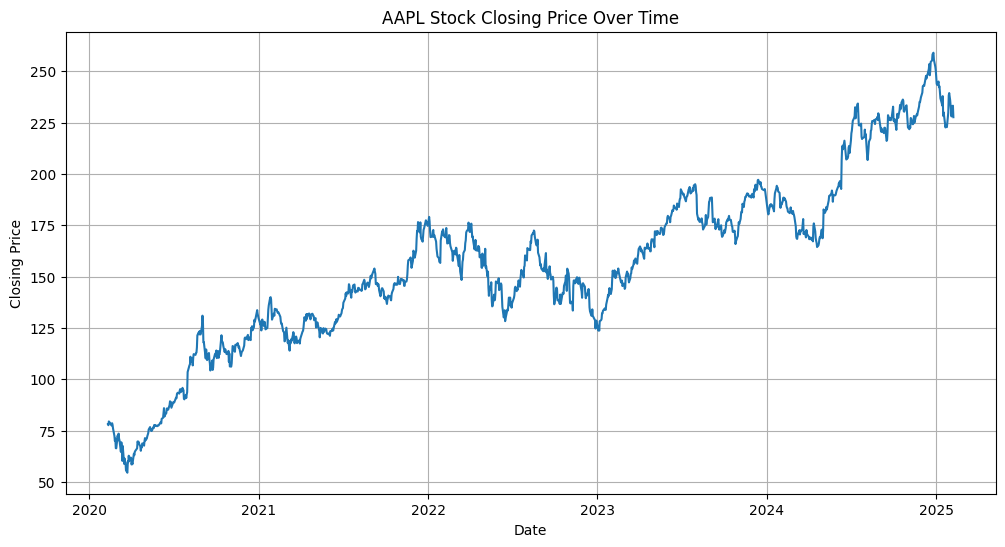

In [10]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [11]:
!pip install fredapi

In [12]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.684,716388.0,102.5969,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.022,720393.0,102.0854,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.150,725925.0,102.2549,1294.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.548,729191.0,103.1942,1499.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [13]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [14]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

In [60]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

##### yhfinance web scrapping

In [67]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,20 hours ago,Apple could launch a new iPhone SE and PowerBe...,Apple could launch a new iPhone SE and PowerBe...
1,1 hour ago,"Can This Unstoppable Stock Join Apple, Microso...","There's one particular industry-leading, tech-..."
2,2 hours ago,Trump’s Team Takes Its Fight to a Wary Europe,Senior administration officials are heading ac...
3,3 hours ago,The Stock Market Has an Earnings Quality Probl...,A dollar in corporate profit isn't always what...
4,5 hours ago,Nvidia AI Server-Maker Hon Hai Signals Stronge...,"(Bloomberg) -- Hon Hai Precision Industry Co.,..."
5,11 hours ago,China’s Strategy in Trade War: Threaten U.S. T...,Officials in Beijing are building a list of po...
6,13 hours ago,T-Mobile to Charge $15 Per Month for Starlink ...,(Bloomberg) -- T-Mobile US Inc.’s tie-up with ...
7,16 hours ago,Apple (AAPL): ‘How Could It Be a Surprise?’ Ji...,We recently published a list of Jim Cramer Dis...
8,21 hours ago,Where Will Palantir Technologies Stock Be in 1...,Palantir Technologies (NASDAQ: PLTR) is probab...
9,yesterday,Apple’s new research robot takes a page from P...,"Last month, Apple offered up more insight into..."


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

### Data Merging